Q2 (Improve): Is the data preprocessing process proposed in the Kaggle post the best preprocessing solution? If yes, please explain why. If not, can you leverage what you learned in the class and your previous experiences to improve data processing, to obtain better accuracies for all these classification models? Describe what is your improved data preprocessing, and what are your improved accuracies? (16 points)

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visulization libraties
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
combine = [train_df, test_df]

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Stratified Sampling

In [8]:
import pandas as pd
from sklearn.utils import resample

def random_sampling_imputation(df, target_col, group_col):
    for group in df[group_col].unique():
        group_df = df[df[group_col] == group]
        non_nulls = group_df[target_col].dropna()
        n_missing = group_df[target_col].isnull().sum()
        if n_missing > 0 and not non_nulls.empty:
            df.loc[(df[group_col] == group) & (df[target_col].isnull()), target_col] = resample(
                non_nulls,
                replace=True,
                n_samples=n_missing,
                random_state=42
            ).values
random_sampling_imputation(train_df, 'Age', 'Pclass')
random_sampling_imputation(train_df, 'Cabin', 'Pclass')
random_sampling_imputation(train_df, 'Embarked', 'Pclass')
print(train_df)


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Similarly for test data

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
import pandas as pd
from sklearn.utils import resample

def random_sampling_imputation(df, target_col, group_col):
    for group in df[group_col].unique():
        group_df = df[df[group_col] == group]
        non_nulls = group_df[target_col].dropna()
        n_missing = group_df[target_col].isnull().sum()
        if n_missing > 0 and not non_nulls.empty:
            df.loc[(df[group_col] == group) & (df[target_col].isnull()), target_col] = resample(
                non_nulls,
                replace=True,
                n_samples=n_missing,
                random_state=42
            ).values
random_sampling_imputation(test_df, 'Age', 'Pclass')
random_sampling_imputation(train_df, 'Cabin', 'Pclass')
random_sampling_imputation(train_df, 'Fare', 'Pclass')
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [27]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,E10,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,G6,2
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,1,35.0,0,0,373450,8.0500,F38,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,D,2
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,0,47.0,1,2,W./C. 6607,23.4500,E121,2
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,0


Now I will use Random forest to get top contributing attributes and then train my data based on it. Also encoding different attributes

In [16]:
train_df = train_df.drop('Name', axis=1)

In [28]:
train_df = train_df.drop('Ticket', axis=1)

In [33]:
train_df['Cabin'] = train_df['Cabin'].str[0]


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df['Embarked'] = le.fit_transform(train_df['Embarked'].astype(str))
train_df['Cabin'] = le.fit_transform(train_df['Cabin'])

In [40]:
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [42]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [43]:
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [44]:
feature_importances = model.feature_importances_

In [45]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [46]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

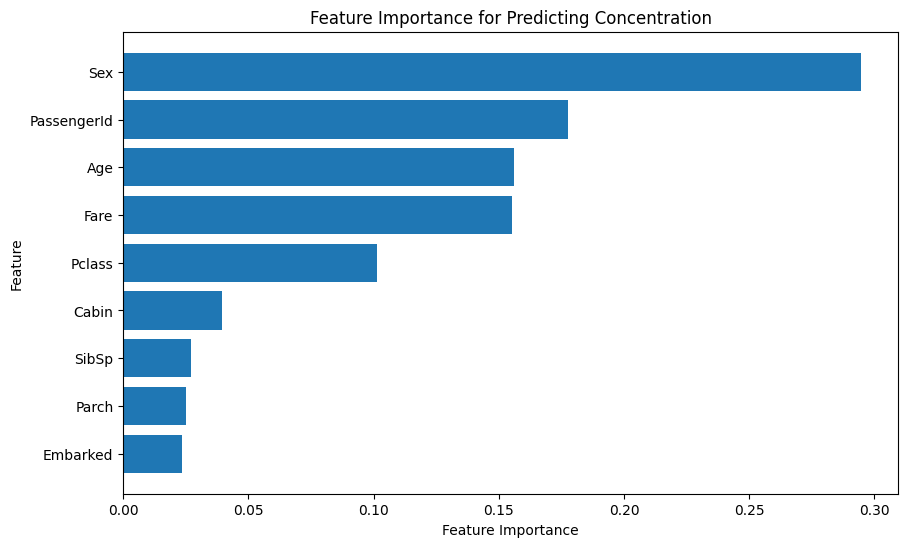

In [47]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Concentration')
plt.gca().invert_yaxis()
plt.show()

In [48]:
print(feature_importance_df)

       Feature  Importance
2          Sex    0.294721
0  PassengerId    0.177456
3          Age    0.156131
6         Fare    0.155240
1       Pclass    0.101375
7        Cabin    0.039551
4        SibSp    0.027141
5        Parch    0.025010
8     Embarked    0.023376


Using top 4 attributes

In [49]:
X = np.array(train_df[['Sex','PassengerId','Age','Fare']])
y = np.array(train_df[['Survived']])

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1) Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
acc_log

82.47

Support Vector Machines

In [72]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
acc_svc

76.28

K-Nearest Neighbours

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


80.06

Gaussian Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


78.23

Perceptron

In [60]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


62.78

In [76]:
acc_perceptron

81.88

Linear Support Vector Machines

In [62]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


74.86

Stochastic Gradient Descent

In [63]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


63.06

In [78]:
acc_sgd

78.17

Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


100.0

In [79]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
2,Logistic Regression,82.47
5,Perceptron,81.88
1,KNN,80.06
4,Naive Bayes,78.23
6,Stochastic Gradient Decent,78.17
0,Support Vector Machines,76.28
7,Linear SVC,74.86
